In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
df = pd.read_csv("C:\\Users\\Ravindra Dange\\Downloads\\gene_expression.csv")
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [33]:
df.shape

(3000, 3)

In [34]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [36]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [37]:
df["Cancer Present"].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [38]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [39]:
df.tail()

,Gene One,Gene Two,Cancer Present
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0
2999,4.6,8.2,0


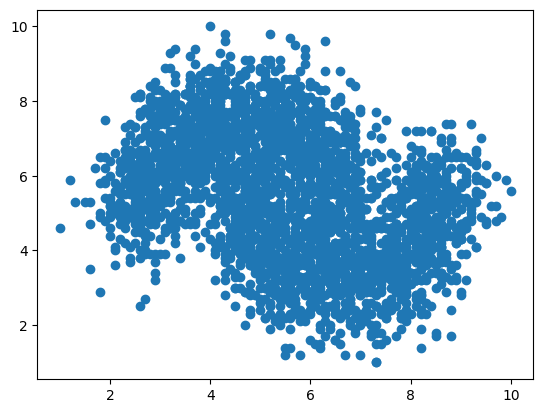

In [40]:
plt.scatter(x=df["Gene One"],y=df["Gene Two"])
plt.show()

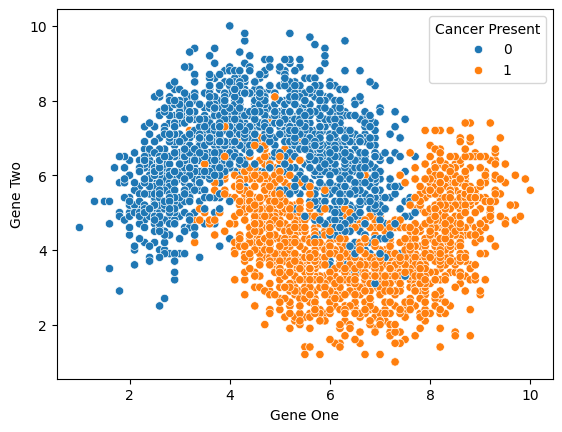

In [41]:
sns.scatterplot(data=df,x=df["Gene One"],y=df["Gene Two"],hue="Cancer Present")
# plt.xlim(2,8)
# plt.ylim(2,6)
plt.show()


In [42]:
x = df.iloc[0:,0:2]
y = df.iloc[0:,2]
print(y)


0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64


In [43]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [45]:
x_train

,Gene One,Gene Two
2369,4.2,7.1
1164,2.8,5.5
477,7.7,4.2
1728,3.3,4.8
1065,5.7,6.1
...,...,...
2514,7.5,3.3
2347,6.1,4.0
1608,4.7,8.7
2541,6.8,2.5


In [46]:
x_test

,Gene One,Gene Two
1291,6.1,6.6
595,7.6,4.9
236,5.5,7.9
2824,2.3,5.5
1290,6.9,1.8
...,...,...
2236,7.3,5.7
1448,2.7,6.7
1189,8.3,5.1
8,5.5,8.6


In [47]:
y_test

1291    0
595     0
236     0
2824    0
1290    1
       ..
2236    0
1448    0
1189    1
8       0
310     0
Name: Cancer Present, Length: 600, dtype: int64

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
kn = KNeighborsClassifier(n_neighbors=5)

In [50]:
model=kn.fit(x_train,y_train)
model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
y_predict = model.predict(x_train)
y_predict

array([0, 0, 1, ..., 0, 1, 1], shape=(2400,))

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:
accuracy = accuracy_score(y_train,y_predict)

In [54]:
arr = confusion_matrix(y_train,y_predict)
print(arr)
print(y_test.shape)

[[1137   60]
 [  65 1138]]
(600,)


In [55]:
import pickle 

In [56]:
with open("knn_project","wb") as file:    # to store your model
    pickle.dump(model,file)

In [57]:
with open("knn_project","rb") as file: 
    cancer_prediction = pickle.load(file)    # with this you can load your model anytime
    

In [58]:
sample = np.array([[6.1,6.2]])
cancer_prediction .predict(sample)

C:\Users\Ravindra Dange\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])